In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/nalin/pol_data.csv", encoding = "ISO-8859-1")
df.head()

C:\Users\nalin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(df["year"].min())
df['year'] = df['year'].values.astype(int)

In [4]:
print (df.dtypes.value_counts())

object            7
float64           5
datetime64[ns]    1
int32             1
dtype: int64


In [5]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total / len(df) * 100
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    print (concat)
    print ( "-------------")

In [6]:
printNullValues(df)

                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
location                          3   0.000688
sampling_date                     3   0.000688
-------------


In [7]:
df["type"].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

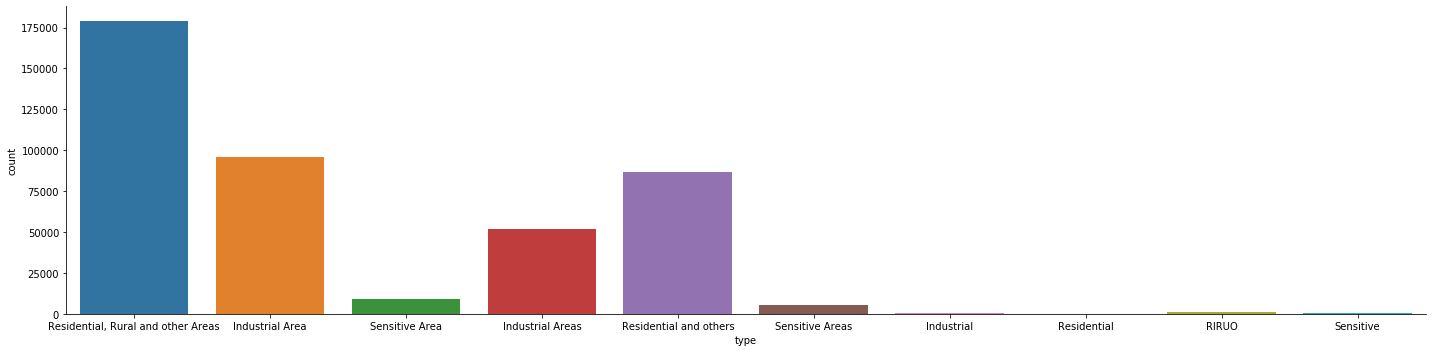

In [8]:
sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4)

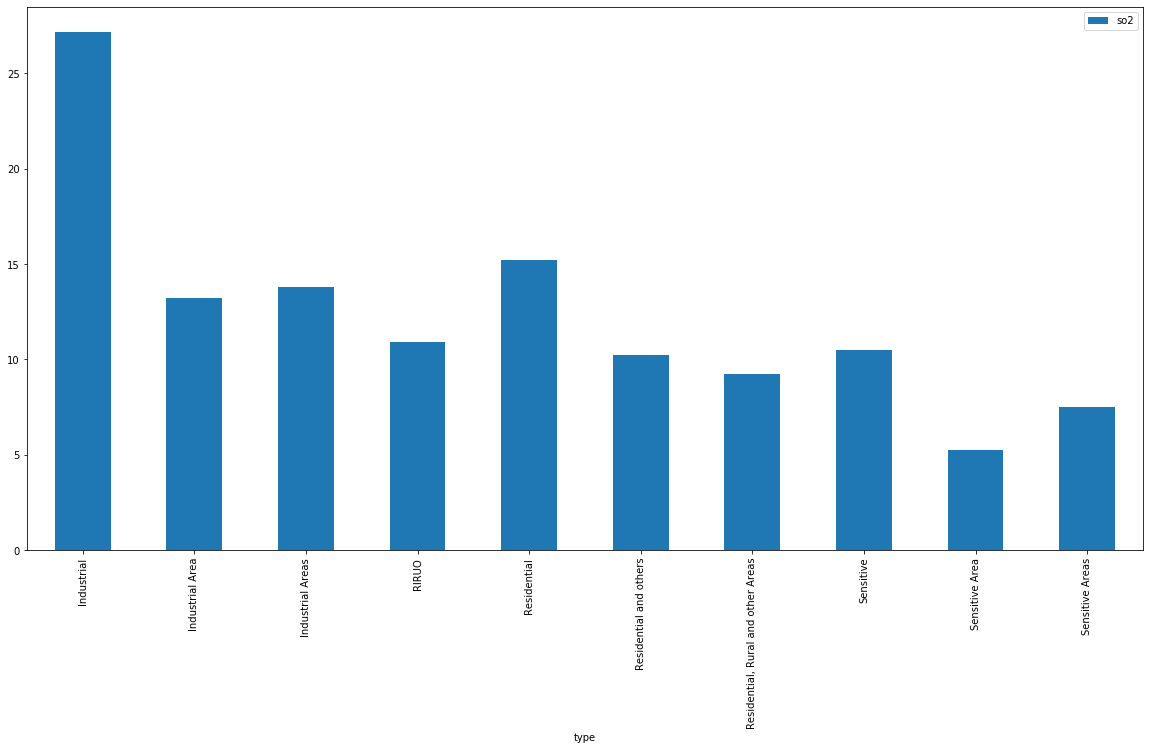

In [9]:
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (20,10))

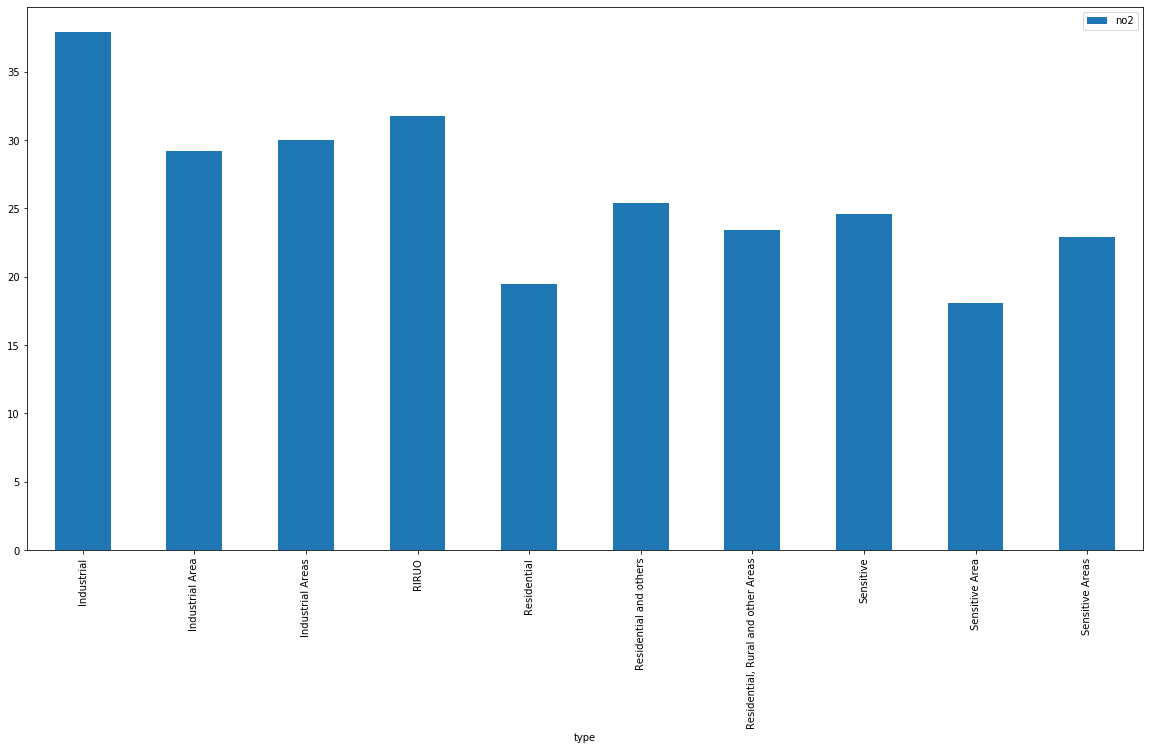

In [10]:
grp = df.groupby(["type"]).mean()["no2"].to_frame()
grp.plot.bar(figsize = (20,10))

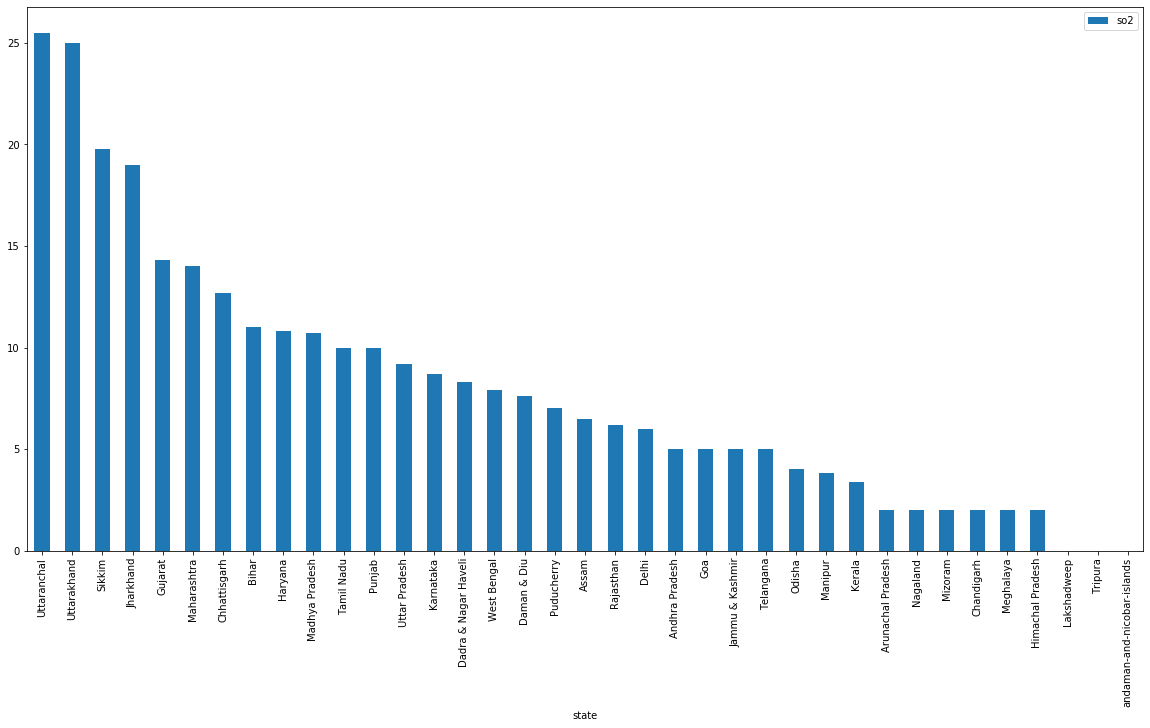

In [11]:
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(figsize=(20,10))

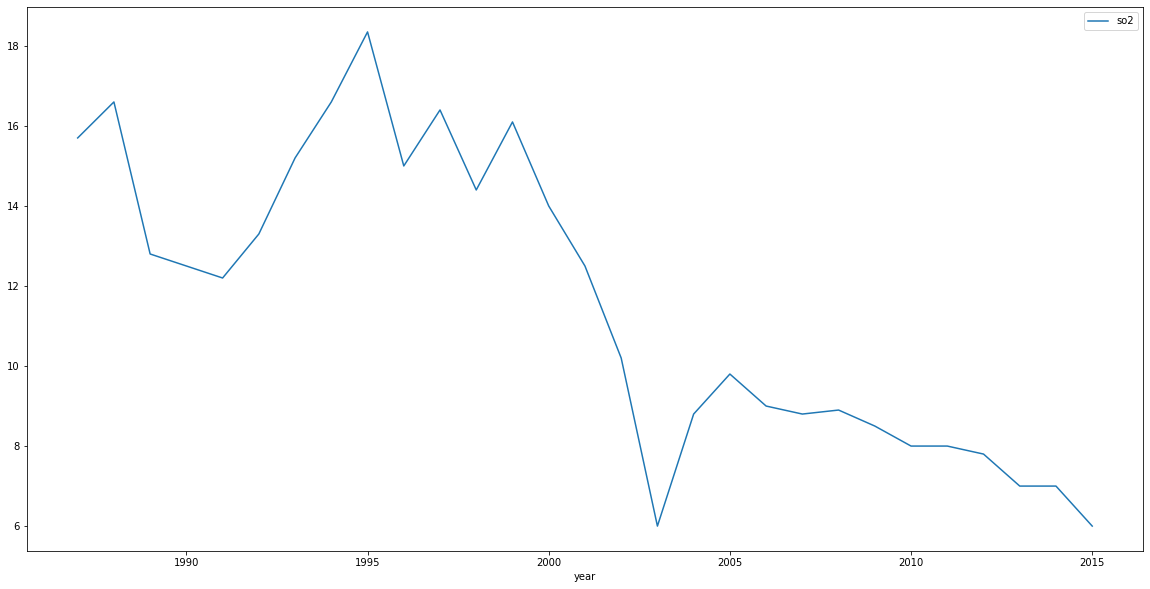

In [12]:
df[['so2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))


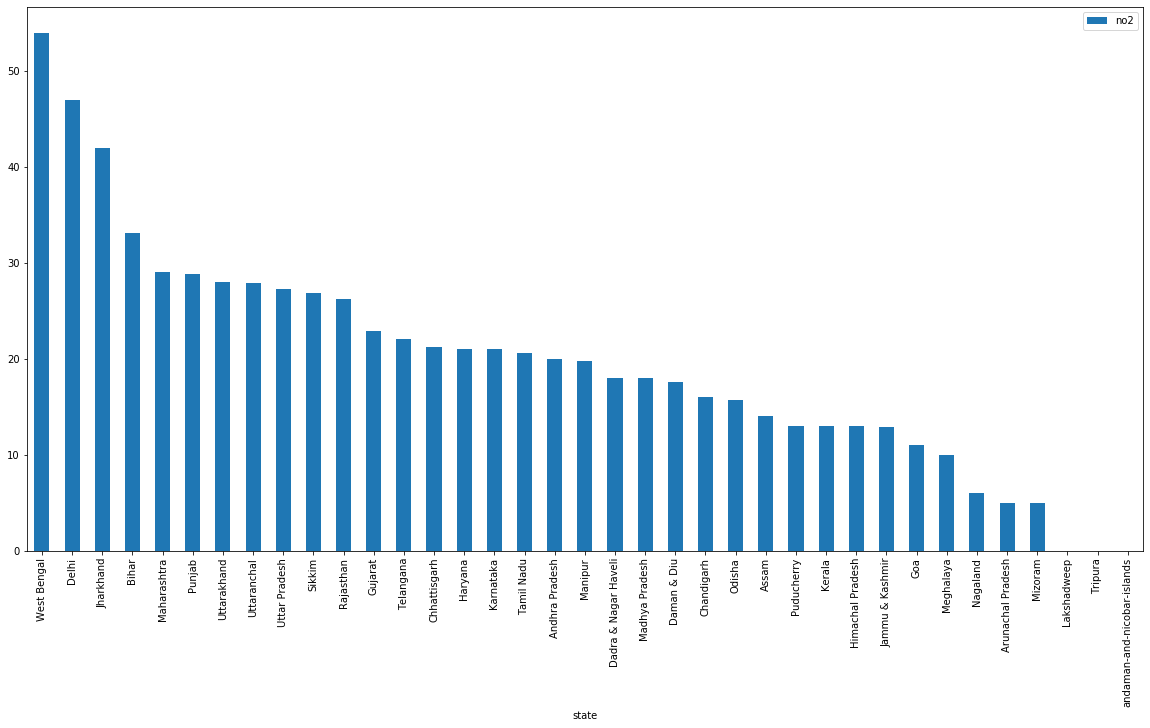

In [13]:
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(figsize=(20,10))

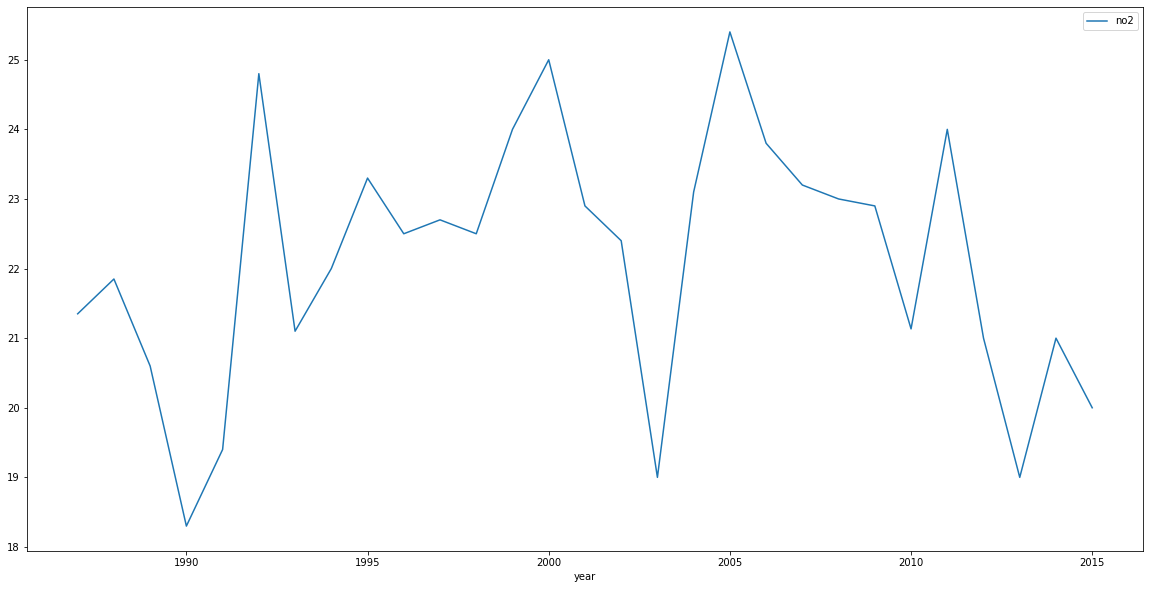

In [14]:
df[['no2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

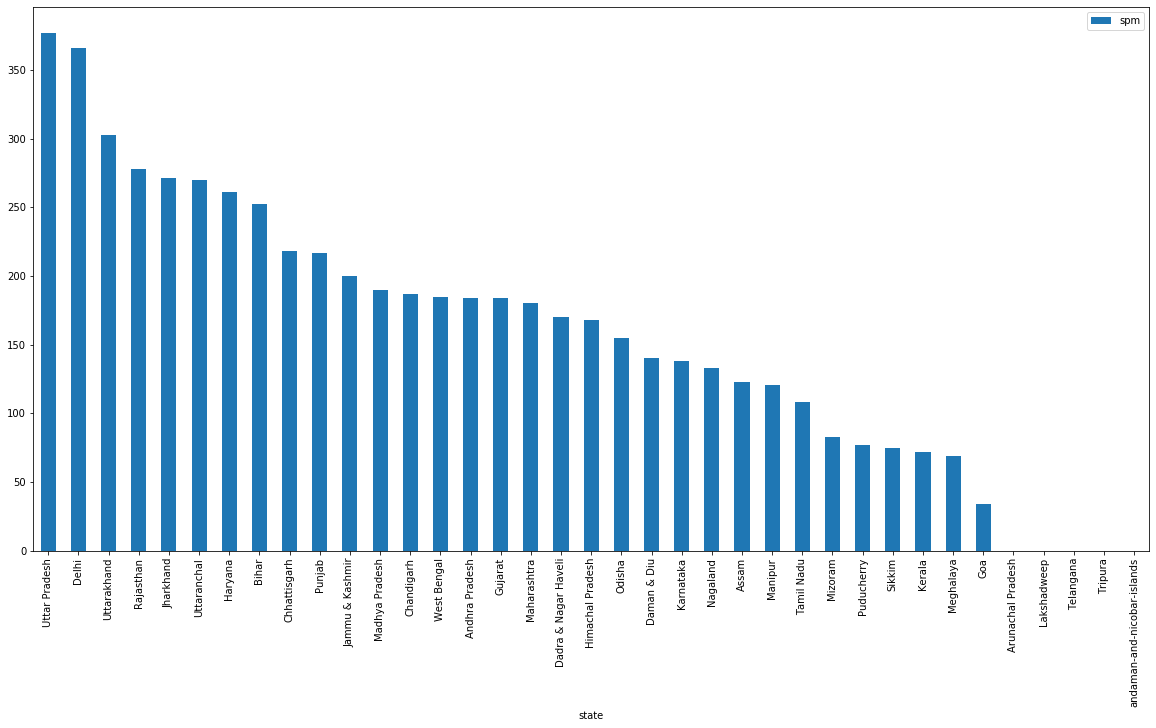

In [15]:
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(figsize=(20,10))

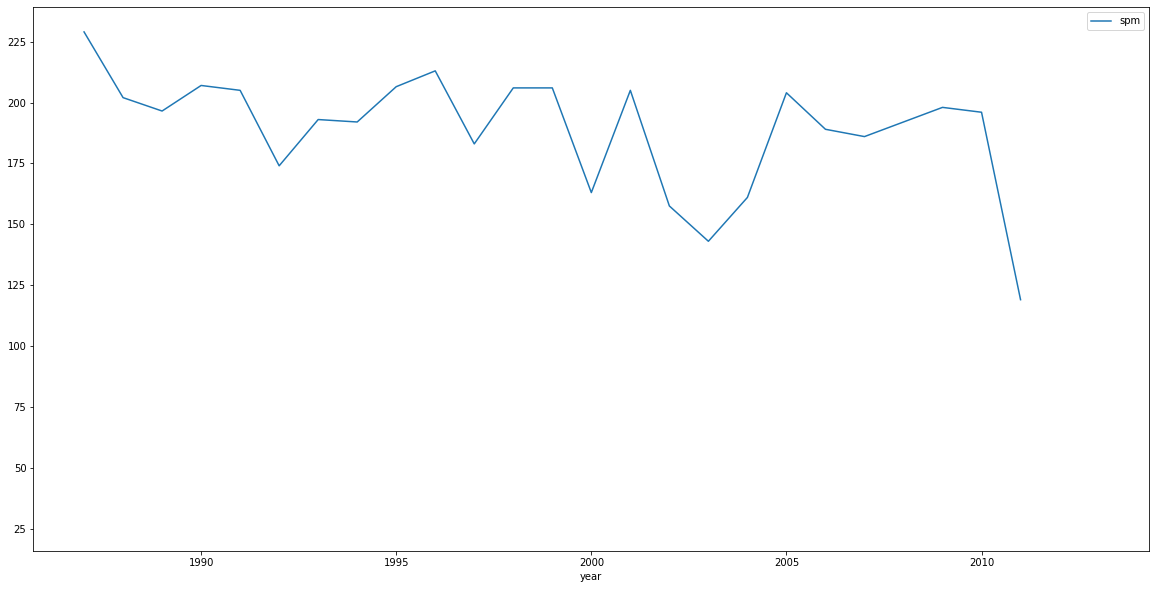

In [16]:
df[['spm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

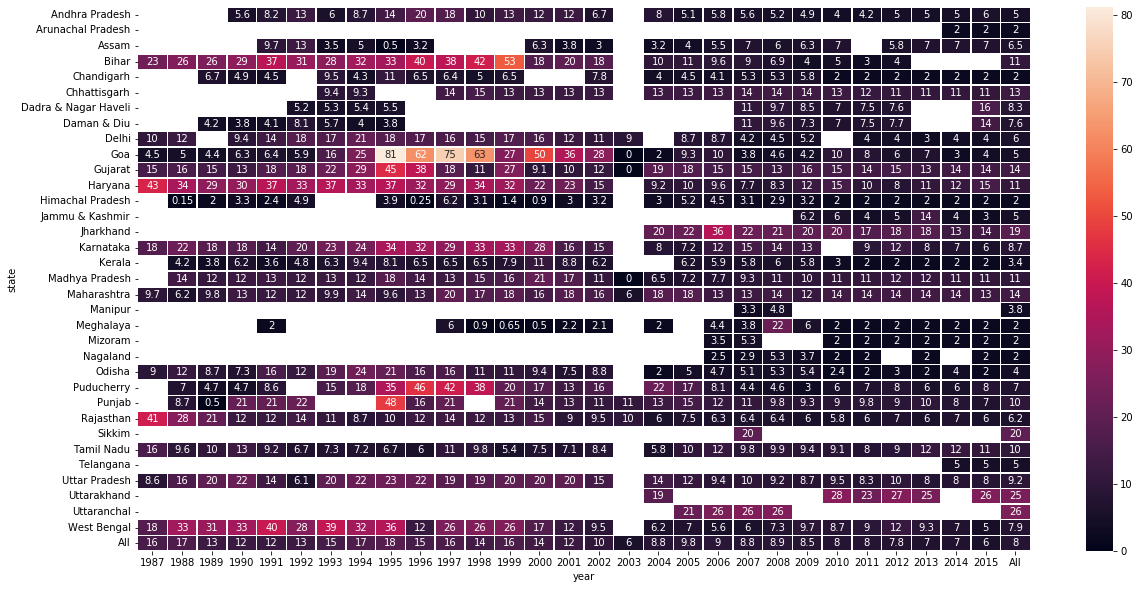

In [17]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('so2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

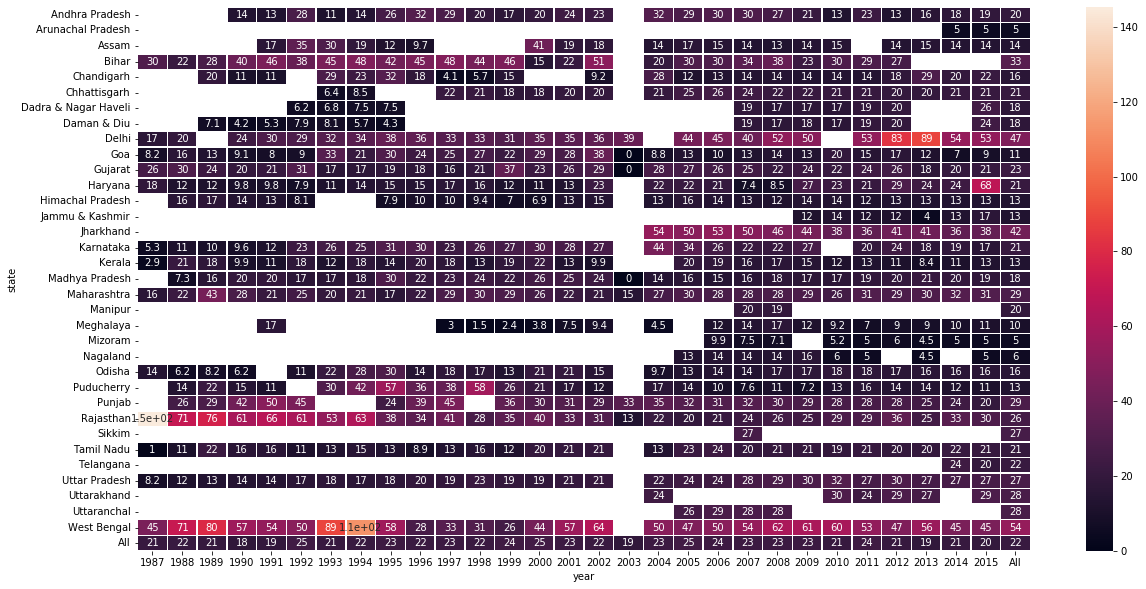

In [18]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('no2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

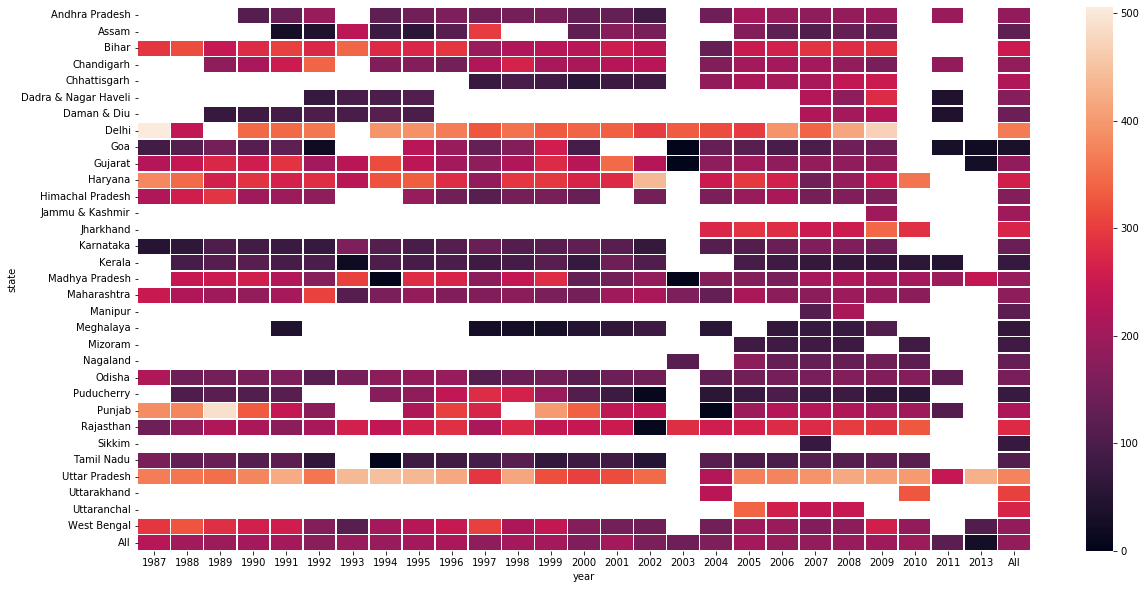

In [19]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('spm', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=False, linewidths=.5)

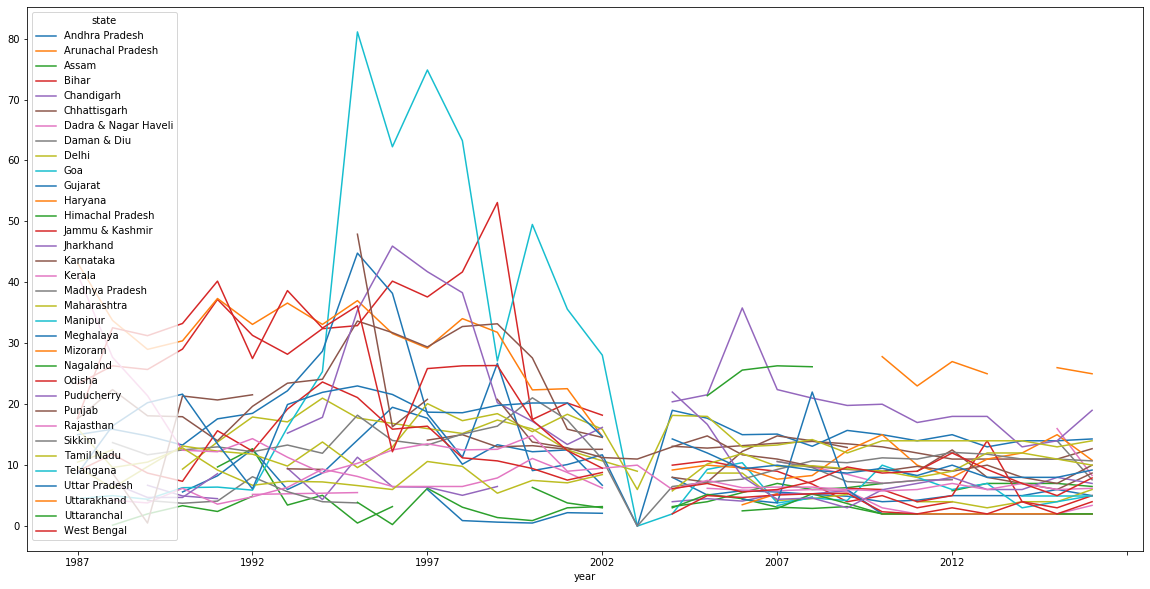

In [20]:
temp = df.pivot_table('so2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

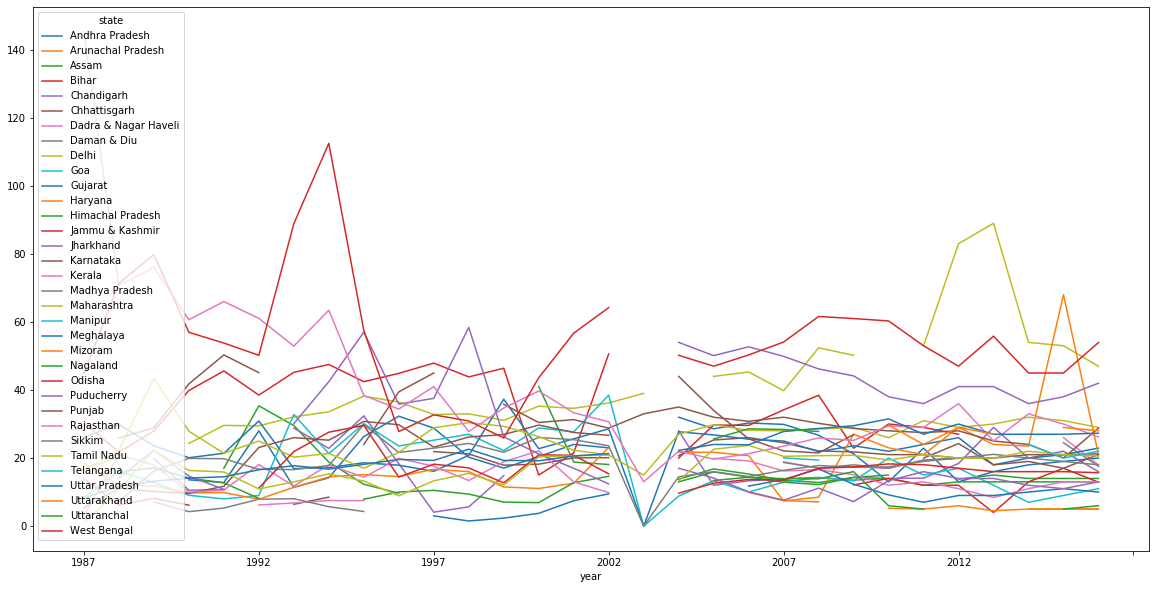

In [21]:
temp = df.pivot_table('no2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

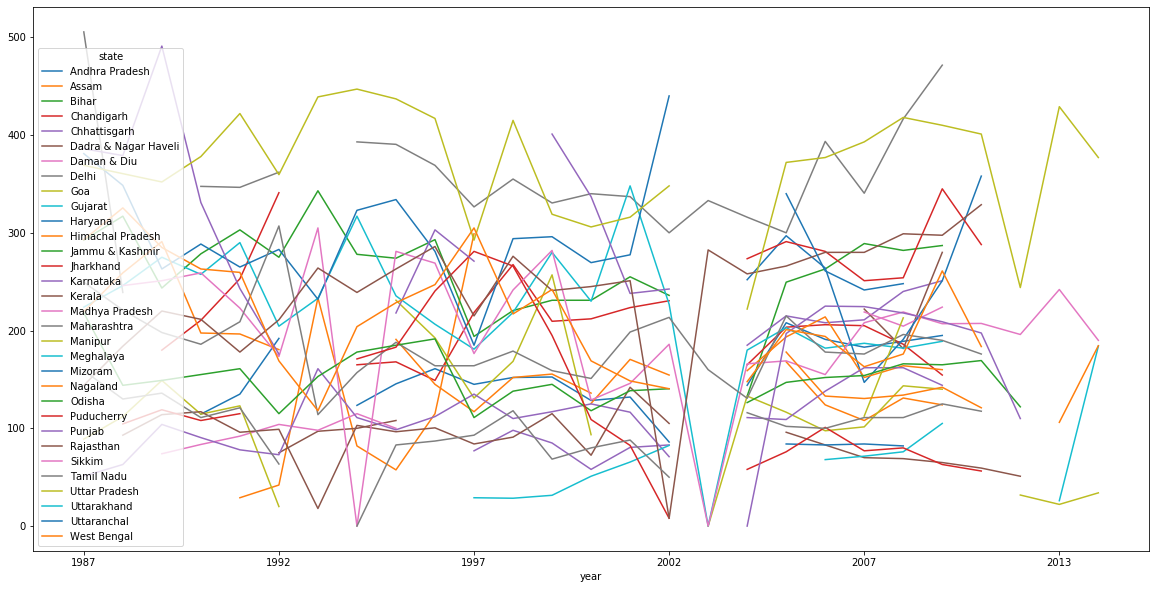

In [22]:
temp = df.pivot_table('spm', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

In [23]:
df_before_2000 = df[df["year"] < 2000]
df_before_2000 = df_before_2000.groupby("state").mean()

df_after_2000 = df[df["year"] > 2000]
df_after_2000 = df_after_2000.groupby("state").mean()

In [24]:
df_so2 = df[["date", "so2"]]
df_so2 = df_so2.set_index("date")
df_so2 = df_so2.dropna()

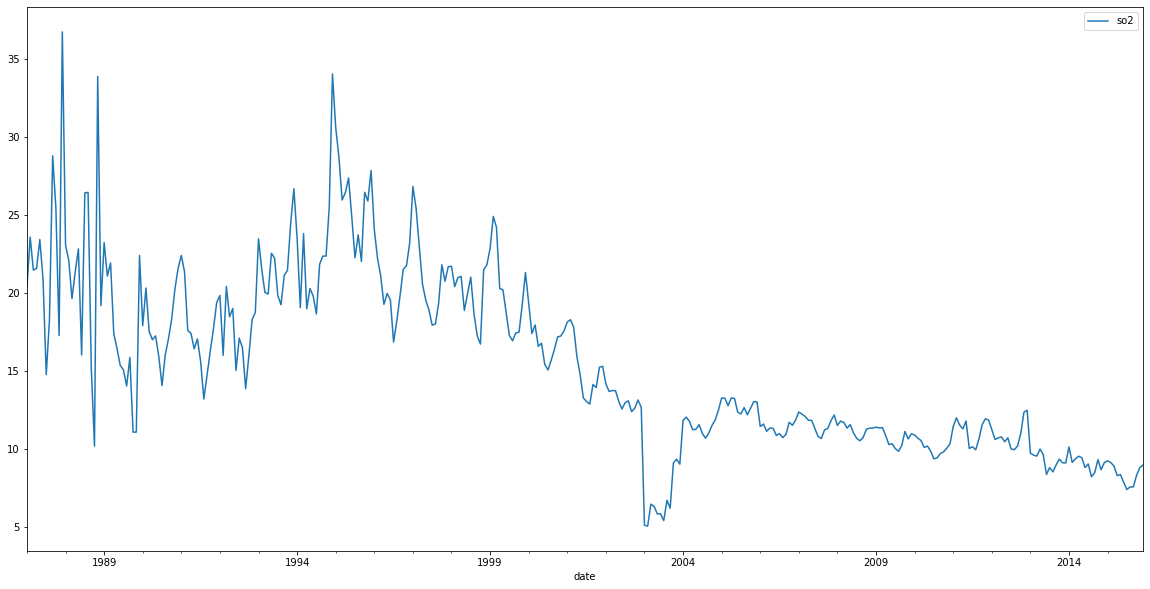

In [25]:
df_so2_resample = df_so2.resample(rule = "M").mean().ffill()
df_so2_resample.plot(figsize = (20,10))

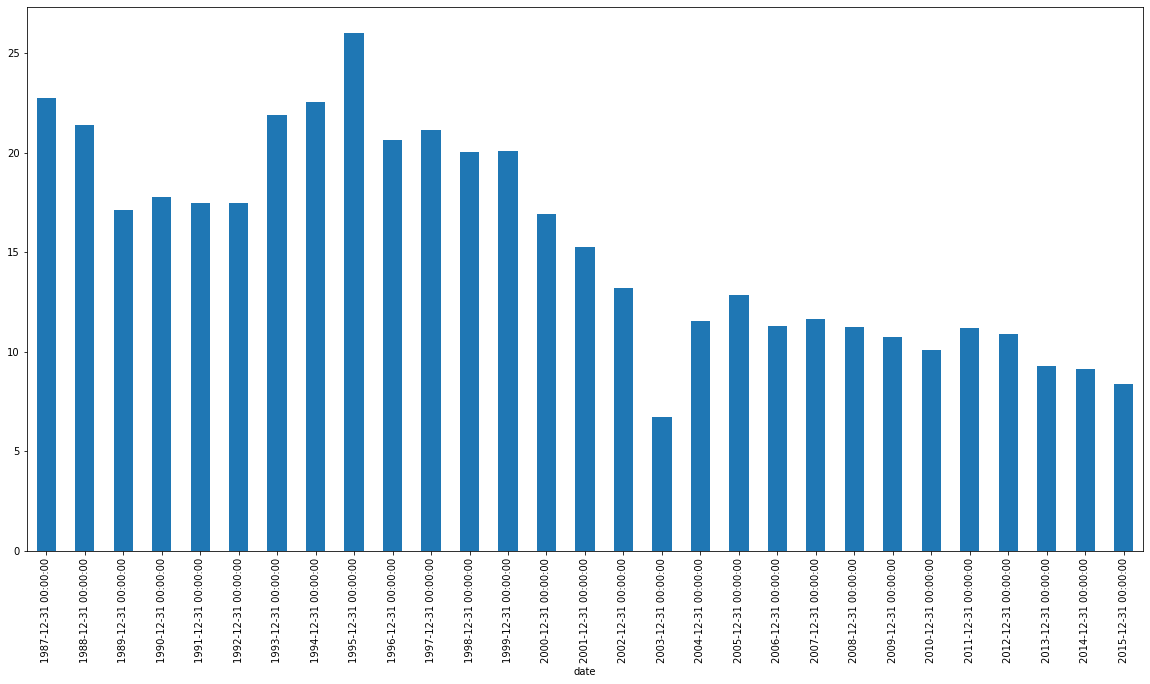

In [26]:
df_so2_resample["so2"].resample("A").mean().plot.bar(figsize = (20,10))

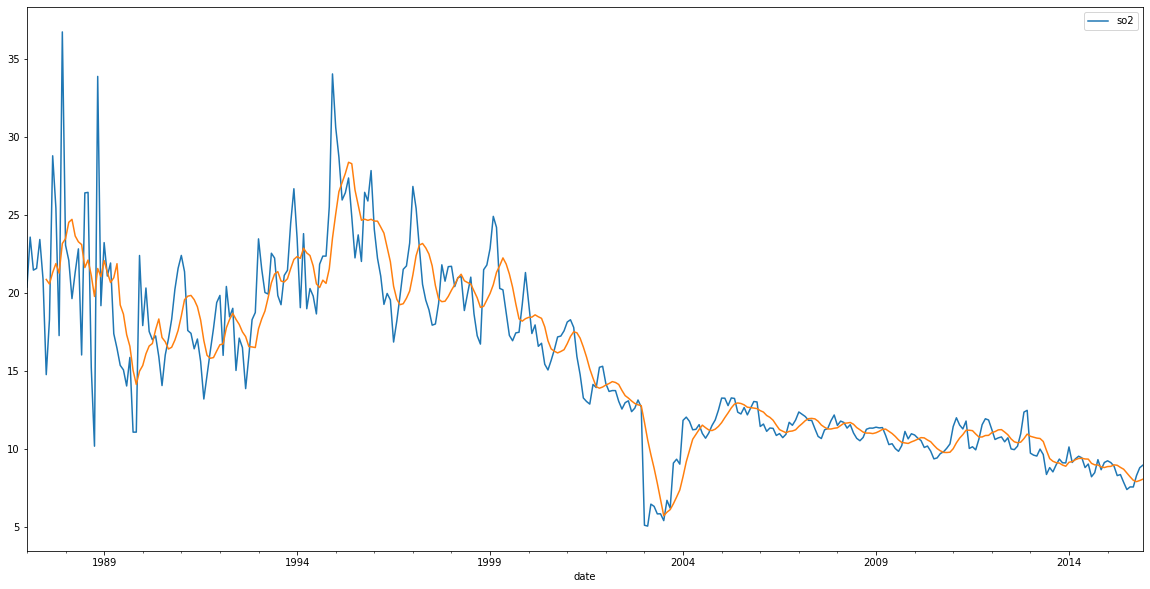

In [27]:
df_so2_resample.plot(figsize = (20,10))
df_so2_resample.rolling(window = 7).mean()["so2"].plot(figsize = (20,10))

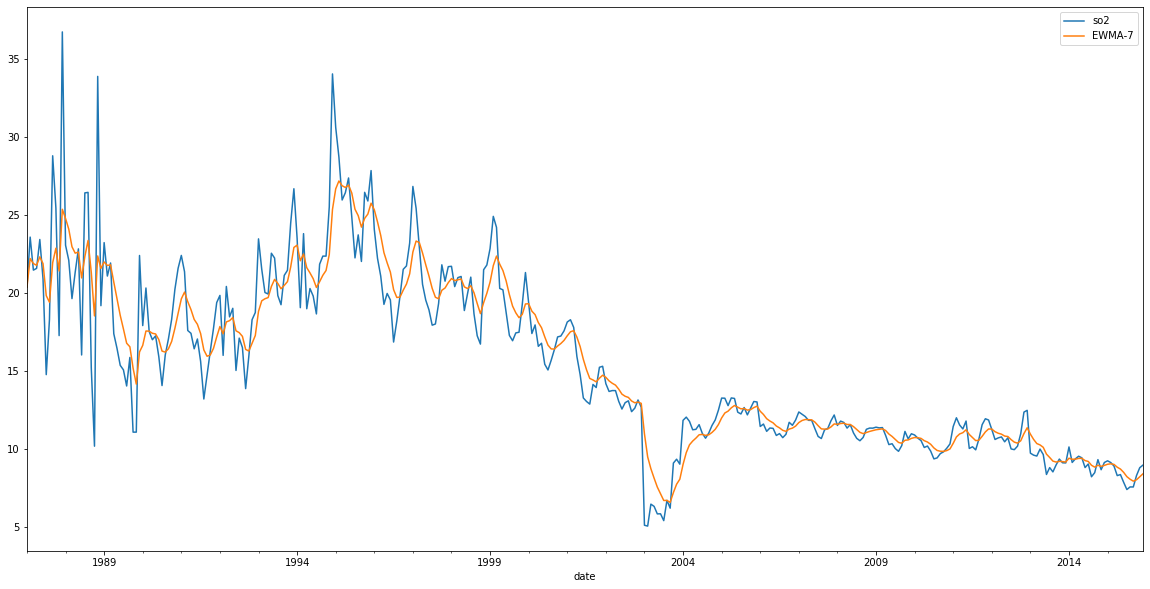

In [28]:
df_so2_resample["EWMA-7"] = df_so2_resample["so2"].ewm(span=7).mean()
df_so2_resample.plot(figsize = (20,10))

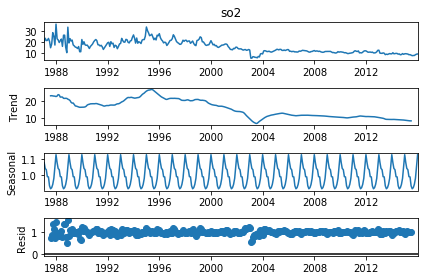

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_so2_resample["so2"], model = "multiplicative") 
fig = result.plot()

In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_so2_resample["so2"])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3887732131662989
p-value : 0.5876463899272559
#Lags Used : 14
Number of Observations Used : 333
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [31]:
df_so2_resample["so2_first_diff"] = df_so2_resample["so2"] - df_so2_resample["so2"].shift(7)
# CHECK
result = adfuller(df_so2_resample["so2_first_diff"].dropna() )
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.264624632775822
p-value : 0.0005112203813366571
#Lags Used : 17
Number of Observations Used : 323
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


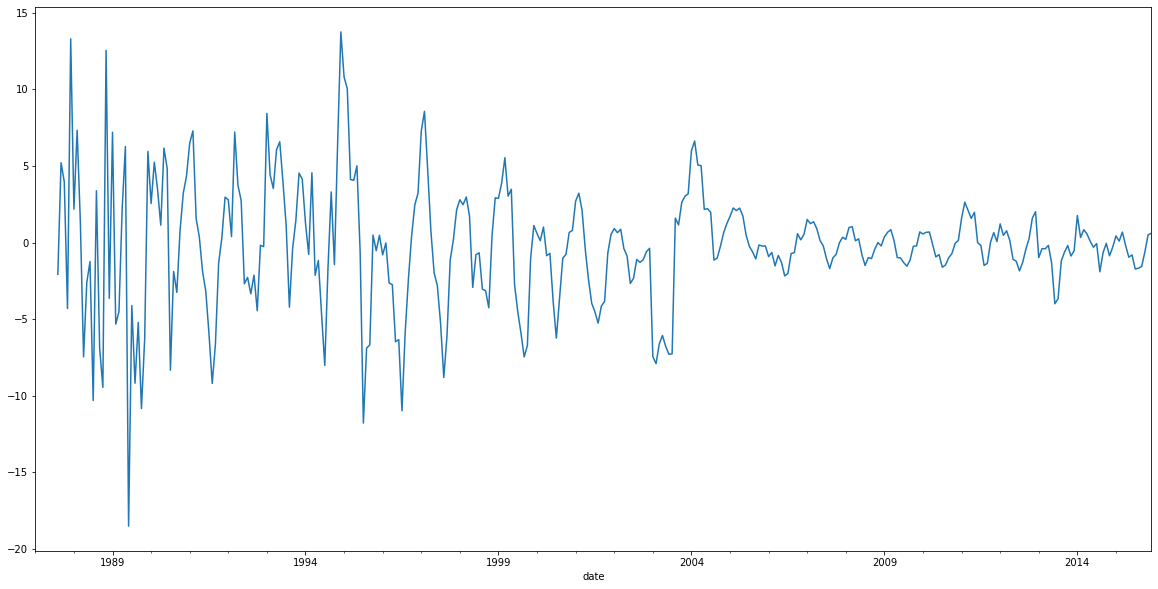

In [32]:
df_so2_resample["so2_first_diff"].plot(figsize = (20,10))

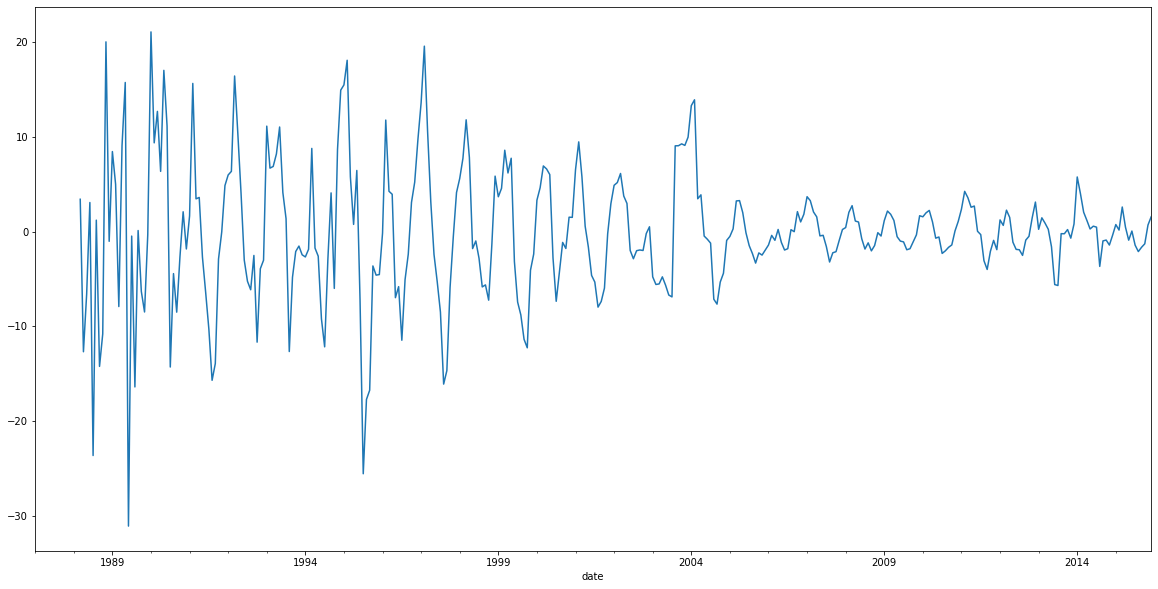

In [33]:
df_so2_resample["so2_second_diff"] = df_so2_resample["so2_first_diff"] - df_so2_resample["so2_first_diff"].shift(7)
df_so2_resample["so2_second_diff"].plot(figsize = (20,10))

C:\Users\nalin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\nalin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                  so2   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 48)   Log Likelihood                -760.884
Date:                              Wed, 24 Nov 2021   AIC                           1527.768
Time:                                      12:10:00   BIC                           1538.869
Sample:                                  01-31-1987   HQIC                          1532.211
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L48      -0.1186      0.249     -0.476      0.634      -0.607       0.370
ma.S.L48      -0.25

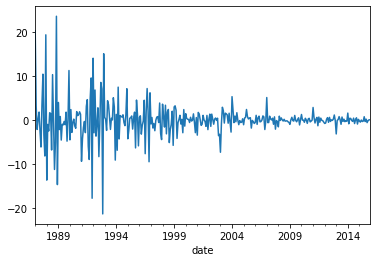

In [34]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(df_so2_resample["so2"],order=(0,1,0), seasonal_order=(1,1,1,48))
results = model.fit()
print(results.summary())
results.resid.plot()

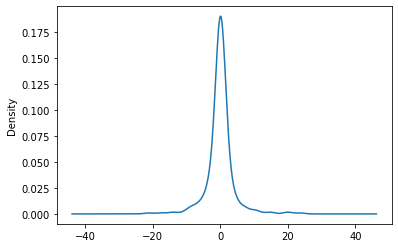

In [35]:
results.resid.plot(kind='kde')

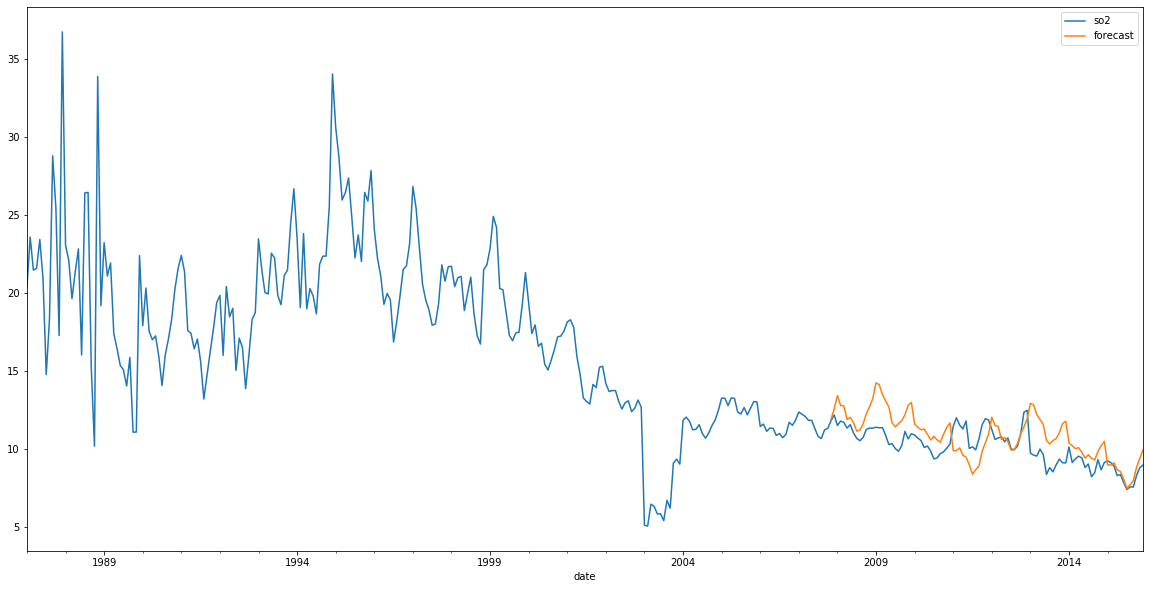

In [36]:
df_so2_resample['forecast'] = results.predict(start = 250, end= 400, dynamic= True)  
df_so2_resample[['so2','forecast']].plot(figsize=(20,10))

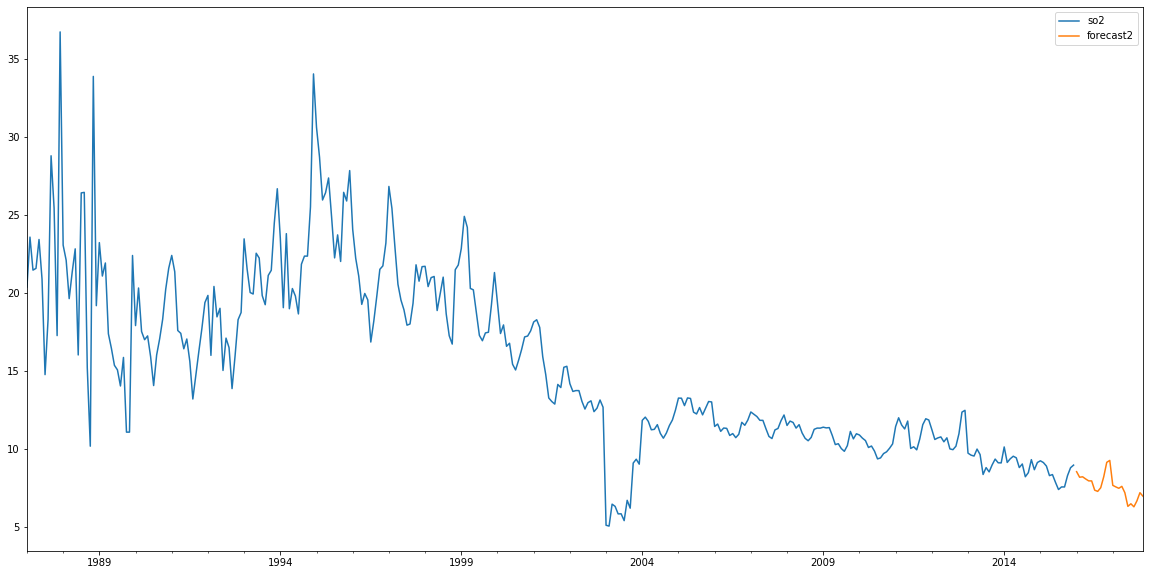

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_so2_resample.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_so2_resample.columns)
future_df = pd.concat([df_so2_resample,future_dates_df])
future_df['forecast2'] = results.predict(start = 348, end = 540, dynamic= True)  
future_df[['so2', 'forecast2']].plot(figsize=(20, 10)) 